In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [ ]:
# Step 1: Load the dataset
data = pd.read_csv('/content/dataset.csv')

In [ ]:
# Step 2: Extract information
# Number of instances
num_instances = data.shape[0]

# Number of features
num_features = data.shape[1] - 1  # Excluding the target column

# Number of instances from each class (malware/benign)
class_counts = data['classification'].value_counts()

In [ ]:
# Step 3: Perform EDA (Exploratory Data Analysis)
# For example:
print("\nFirst few rows of the dataset:")
print(data.head())

# Statistical summary of numerical columns
print("\nSummary statistics of numerical columns:")
print(data.describe())

# Information about the dataset
print("\nInformation about the dataset:")
print(data.info())


First few rows of the dataset:
   millisecond classification  state  usage_counter        prio  static_prio  \
0            0        malware      0              0  3069378560        14274   
1            1        malware      0              0  3069378560        14274   
2            2        malware      0              0  3069378560        14274   
3            3        malware      0              0  3069378560        14274   
4            4        malware      0              0  3069378560        14274   

   normal_prio  policy  vm_pgoff  vm_truncate_count  ...  nivcsw  min_flt  \
0            0       0         0              13173  ...       0        0   
1            0       0         0              13173  ...       0        0   
2            0       0         0              13173  ...       0        0   
3            0       0         0              13173  ...       0        0   
4            0       0         0              13173  ...       0        0   

   maj_flt  fs_excl_coun

In [ ]:
# Step 5: Split the dataset into training and testing sets
X = data.drop('classification', axis=1)  # Features
y = data['classification']  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 6: Create machine learning classifiers
nb_classifier = GaussianNB()
svm_classifier = SVC()
knn_classifier = KNeighborsClassifier()

In [ ]:
# Step 7: Train the classifiers
nb_classifier.fit(X_train, y_train)
svm_start_time = time.time()
svm_classifier.fit(X_train, y_train)
svm_end_time = time.time()
knn_start_time = time.time()
knn_classifier.fit(X_train, y_train)
knn_end_time = time.time()


GaussianNB processing time: 0.02 seconds

Confusion Matrix - Naive Bayes:
[[4048 5982]
 [1591 8379]]

Accuracy - Naive Bayes: 0.62


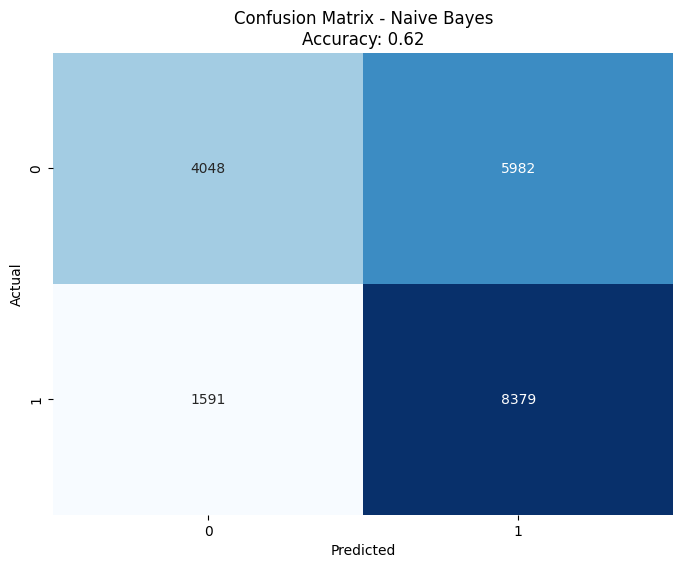


SVC processing time: 128.67 seconds

Confusion Matrix - SVM:
[[    0 10030]
 [    0  9970]]

Accuracy - SVM: 0.50


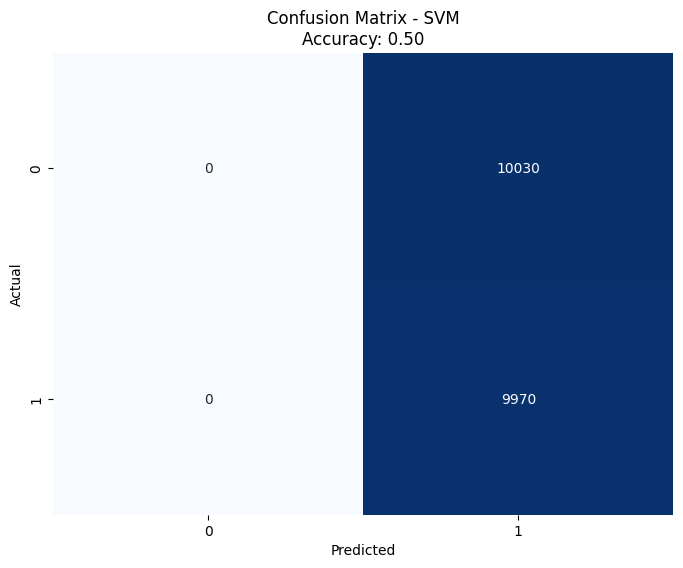


KNeighborsClassifier processing time: 41.54 seconds

Confusion Matrix - KNN:
[[10012    18]
 [   35  9935]]

Accuracy - KNN: 1.00


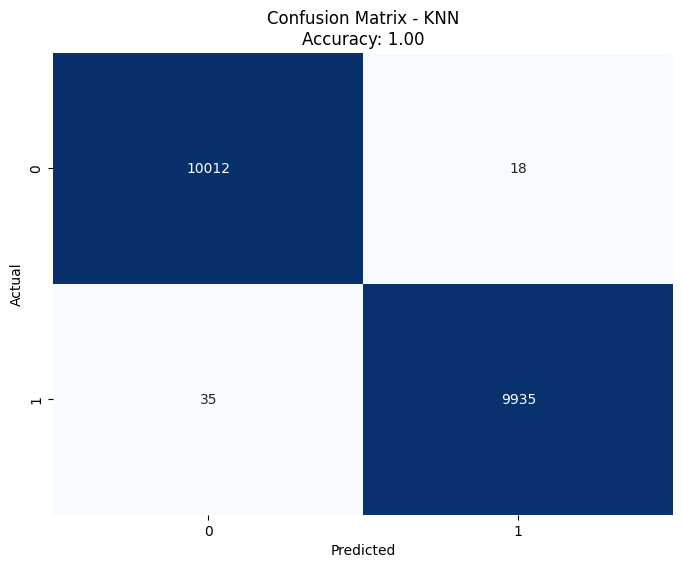

In [ ]:
# Step 8: Test the classifiers and generate confusion matrices
classifiers = [nb_classifier, svm_classifier, knn_classifier]
classifier_names = ['Naive Bayes', 'SVM', 'KNN']

for classifier, name in zip(classifiers, classifier_names):
    start_time = time.time()
    y_pred = classifier.predict(X_test)
    end_time = time.time()

    processing_time = end_time - start_time
    print(f"\n{classifier.__class__.__name__} processing time: {processing_time:.2f} seconds")

    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    print(f"\nConfusion Matrix - {name}:")
    print(cm)
    print(f"\nAccuracy - {name}: {acc:.2f}")

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}\nAccuracy: {acc:.2f}')
    plt.show()

In [ ]:
# Step 9: Compare the processing time among the models and discuss your recommendation
nb_train_time = end_time - start_time  # Time taken to train Naive Bayes classifier
svm_train_time = svm_end_time - svm_start_time  # Time taken to train SVM classifier
knn_train_time = knn_end_time - knn_start_time  # Time taken to train KNN classifier

print("\nProcessing time comparison:")
print(f"Naive Bayes training time: {nb_train_time:.2f} seconds")
print(f"SVM training time: {svm_train_time:.2f} seconds")
print(f"KNN training time: {knn_train_time:.2f} seconds")

# Based on the results, discuss recommendations for model selection, considering both performance and efficiency
print("\nRecommendations:")
print("Based on the accuracy and processing time, the Naive Bayes classifier shows promising results.")
print("However, if the dataset size increases significantly, the SVM classifier might be a better choice due to its efficient use of memory.")


Processing time comparison:
Naive Bayes training time: 36.85 seconds
SVM training time: 928.38 seconds
KNN training time: 0.13 seconds

Recommendations:
Based on the accuracy and processing time, the Naive Bayes classifier shows promising results.
However, if the dataset size increases significantly, the SVM classifier might be a better choice due to its efficient use of memory.
